# Geo data exploration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
import math

%matplotlib inline

In [4]:
LAT_TO_M = 111176.46161222676
LONG_TO_M = 75643.46720256942
GEO_MEAN_WINDOW = 5

In [5]:
df = pd.read_csv('towork1.csv')

In [6]:
df['lat'] = pd.rolling_mean(df['lat'], GEO_MEAN_WINDOW)
df['long'] = pd.rolling_mean(df['long'], GEO_MEAN_WINDOW)

/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  """Entry point for launching an IPython kernel.
/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).mean()
  


In [7]:
df['dt'] = [datetime.datetime.fromtimestamp(x/1000) for x in df['timestamp'].values]
df['Ddt'] = df.diff()['dt']
df['Dlat'] = df.diff()['lat']
df['Dlong'] = df.diff()['long']


df['Dlat'] = df['Dlat'] * LAT_TO_M
df['Dlong'] = df['Dlong'] * LONG_TO_M
df['d_euc'] = [math.sqrt(a**2 + b**2) for (a, b) in zip(df['Dlat'].values, df['Dlong'].values)]
df['a_sum'] = [math.sqrt(x**2 + y**2 + x**2) for (x, y, z) in zip(df['ax'], df['ay'], df['az'])]





In [8]:
df['Ddt'][0] = 1
df['d_euc'][0] = 0
df['speed'] = [(d / (int(t) / 1000 / 1000 / 1000)) for (d, t) in zip(df['d_euc'].values, df['Ddt'].values)]
df['speed'] = df['speed'] * 3.6
df['Dspeed'] = df.diff()['speed']
df['a_calc'] = [v/(float(t)/1000/1000/1000) for v,t in zip(df['Dspeed'].values, df['Ddt'].values)]
df['2a_diff'] = np.sqrt(df['a_calc']**2) - np.sqrt(df['a_sum']**2)





/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df[['dt','Ddt','d_euc','speed', 'a_calc', 'a_sum', '2a_diff']][400:450]

,dt,Ddt,d_euc,speed,a_calc,a_sum,2a_diff
400,2017-09-15 11:09:35.355,00:00:01.090000,4.907552,16.208428,0.708003,4.395755,-3.687752
401,2017-09-15 11:09:36.225,00:00:00.870000,2.141553,8.861600,-8.444631,1.853237,6.591394
402,2017-09-15 11:09:38.353,00:00:02.128000,1.777002,3.006207,-2.751594,5.328291,-2.576696
403,2017-09-15 11:09:39.303,00:00:00.950000,17.138062,64.944236,65.197925,3.661256,61.536669
404,2017-09-15 11:09:40.436,00:00:01.133000,16.712550,53.102542,-10.451628,5.773856,4.677772
405,2017-09-15 11:09:41.394,00:00:00.958000,16.709907,62.792969,10.115268,4.055727,6.059542
406,2017-09-15 11:09:42.405,00:00:01.011000,17.704945,63.044313,0.248610,3.902899,-3.654289
407,2017-09-15 11:09:43.233,00:00:00.828000,17.704945,76.978020,16.828148,2.494634,14.333515
408,2017-09-15 11:09:44.294,00:00:01.061000,4.206502,14.272769,-59.100142,1.226075,57.874068
409,2017-09-15 11:09:47.215,00:00:02.921000,4.081915,5.030775,-3.163983,2.202943,0.961040


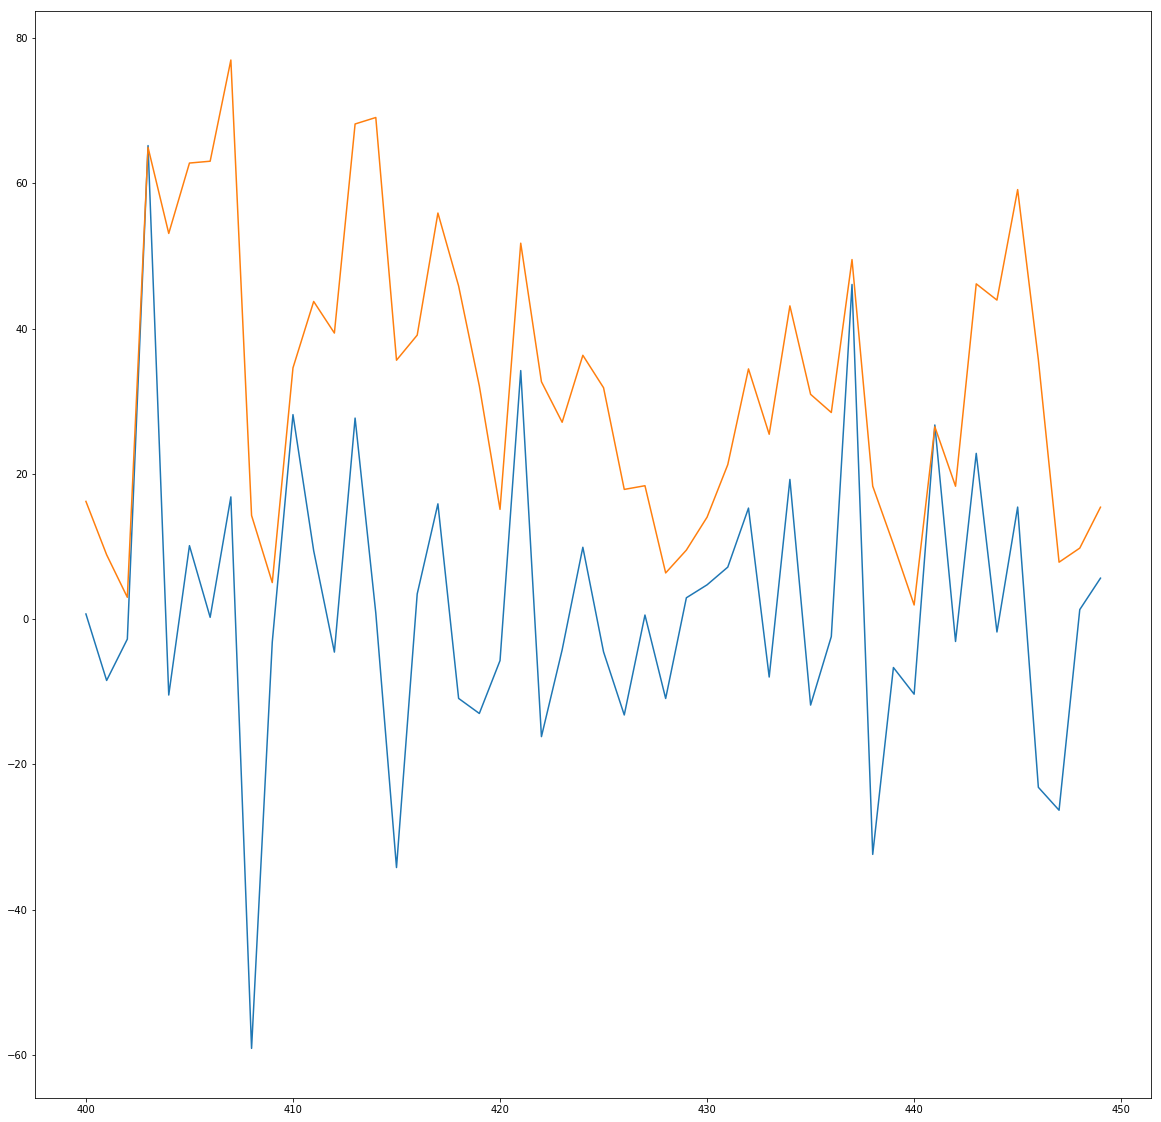

In [10]:
#plt.plot(df['a_sum'])
plt.figure(figsize=(20,20))
#plt.plot(df['2a_diff'][400:450])
plt.plot(df['a_calc'][400:450])
plt.plot(df['speed'][400:450])



/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  """Entry point for launching an IPython kernel.


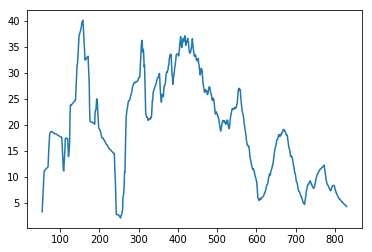

In [11]:
plt.plot(pd.rolling_mean(df['speed'],50))

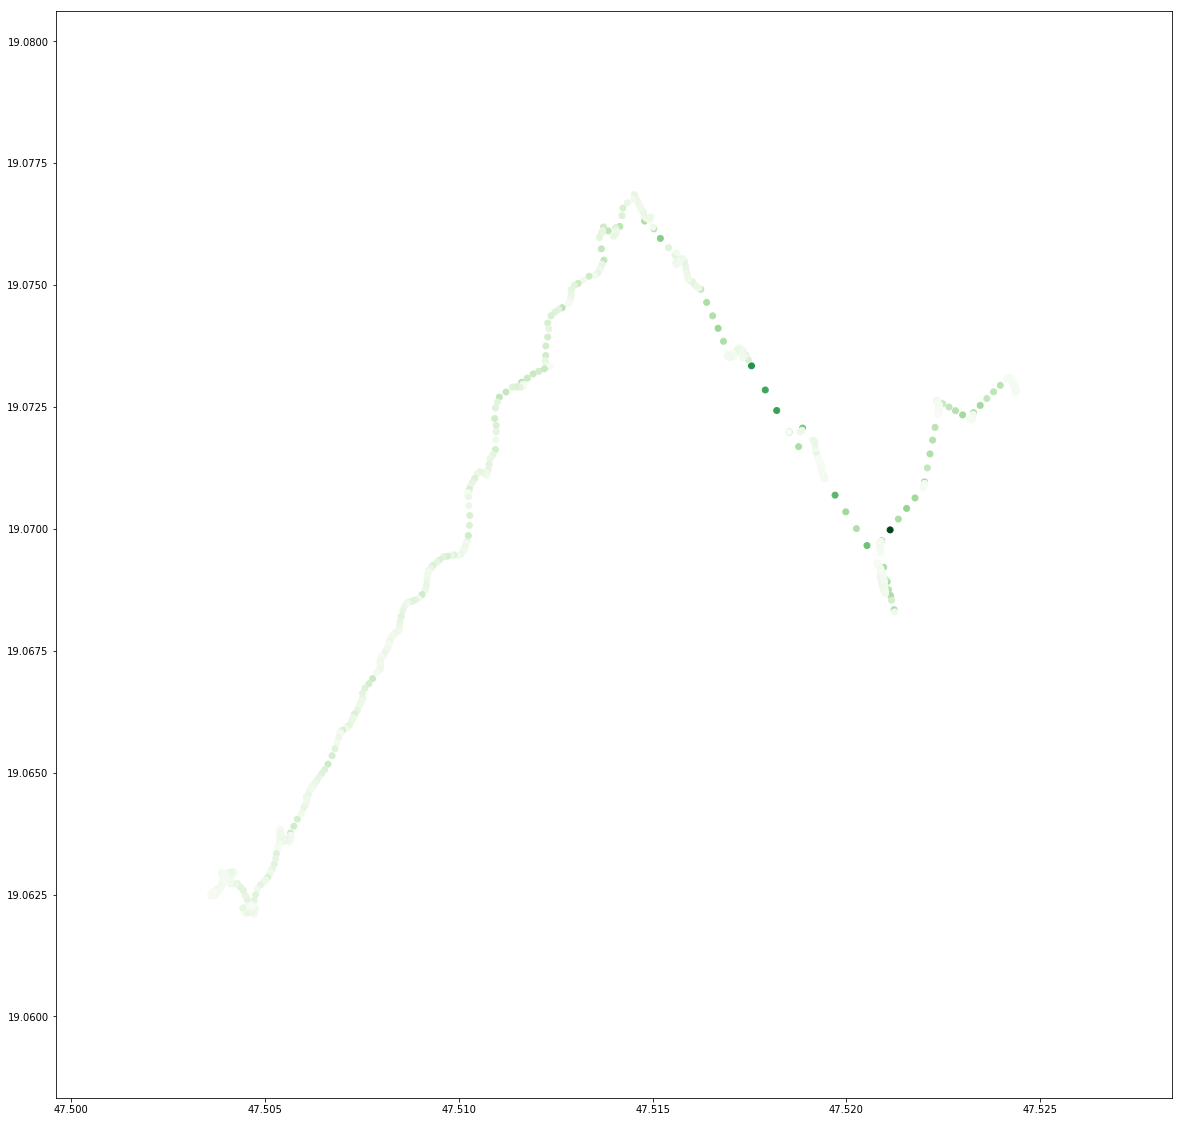

In [12]:
plt.figure(figsize=(20,20))
plt.scatter(df['lat'].values,df['long'].values, c=df['speed'].values, cmap='Greens')

# Kalman filtering

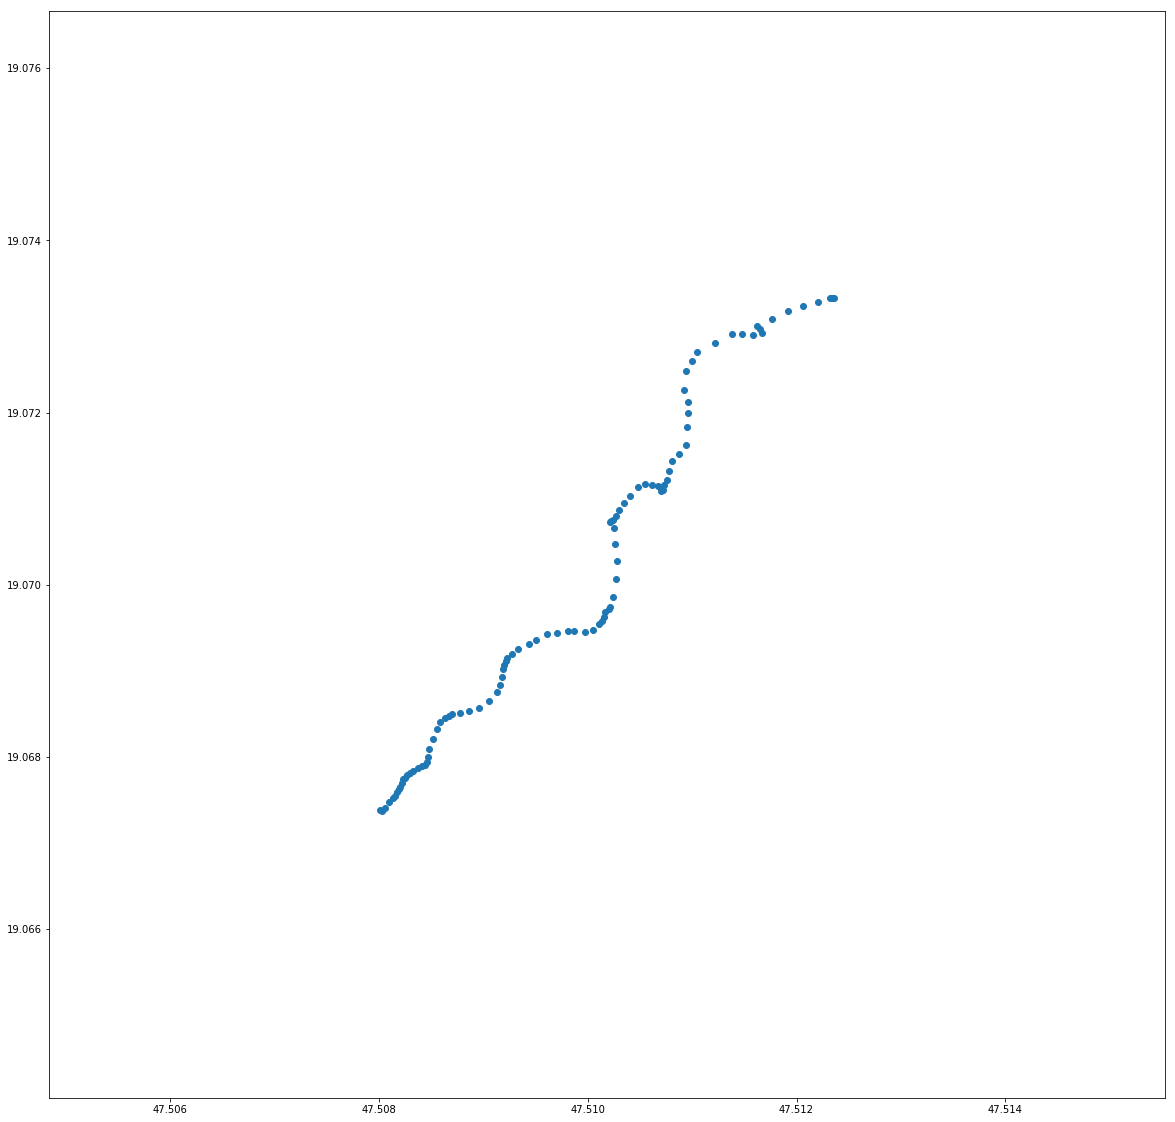

In [13]:
plt.figure(figsize=(20,20))
slice = df[400:500]
plt.scatter(slice['lat'].values, slice['long'].values)

In [14]:
slice[['Ddt','d_euc','speed', 'a_calc', 'a_sum', '2a_diff']]

,Ddt,d_euc,speed,a_calc,a_sum,2a_diff
400,00:00:01.090000,4.907552,16.208428,0.708003,4.395755,-3.687752
401,00:00:00.870000,2.141553,8.861600,-8.444631,1.853237,6.591394
402,00:00:02.128000,1.777002,3.006207,-2.751594,5.328291,-2.576696
403,00:00:00.950000,17.138062,64.944236,65.197925,3.661256,61.536669
404,00:00:01.133000,16.712550,53.102542,-10.451628,5.773856,4.677772
405,00:00:00.958000,16.709907,62.792969,10.115268,4.055727,6.059542
406,00:00:01.011000,17.704945,63.044313,0.248610,3.902899,-3.654289
407,00:00:00.828000,17.704945,76.978020,16.828148,2.494634,14.333515
408,00:00:01.061000,4.206502,14.272769,-59.100142,1.226075,57.874068
409,00:00:02.921000,4.081915,5.030775,-3.163983,2.202943,0.961040


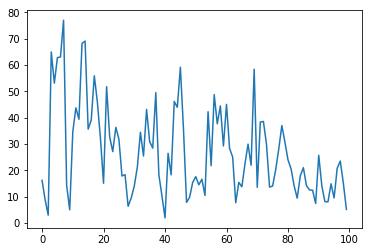

In [15]:
plt.plot(slice['speed'].values)

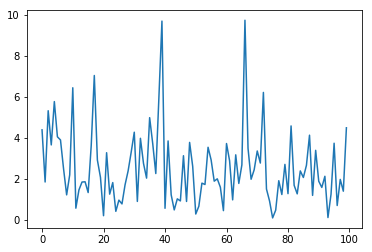

In [16]:
plt.plot(slice['a_sum'].values)

In [20]:
class Kalman():
    def __init__(self):
        self.x = np.array([[0.], [0.]]) # initial state (location and velocity)
        self.reset()
        
    def reset(self):
        self.P = np.array([[1000., 0.], [0., 1000.]]) # initial uncertainty
        self.u = np.array([[0.], [0.]]) # external motion
        self.F = np.array([[1., 1.], [0, 1.]]) # next state function
        self.H = np.array([[1., 0.]]) # measurement function
        self.R = np.array([[1.]]) # measurement uncertainty
        self.I = np.array([[1., 0.], [0., 1.]]) # identity matrix      
        
    def feed_meas(self, measurement):
        z = np.array([[measurement]]) # z - measurement matrix

    
        y = z - np.dot(self.H, self.x) # error : previous state - measurement X measurement matrix
        S = np.dot(np.dot(self.H, self.P), self.H.transpose()) + self.R
        K = np.dot(np.dot(self.P, self.H.transpose()), np.linalg.inv(S)) # kalman gain

        print ('z', z)
        print ('y', y)
        print ('S', S)
        print ('K', K)
        
        self.x = self.x + np.dot(K, y) # new state : x + kalman gain X error
        self.P = np.dot((self.I - np.dot(K, self.H)), self.P) # adjusting uncertainty covariance

    def predict_next_state(self):
        self.x = np.dot(self.F, self.x) + self.u # new state : movement matrix X current state + movement
        self.P = np.dot(np.dot(self.F, self.P), self.F.transpose()) # adjusting covar matrix 
    

In [22]:
k = Kalman()
k.feed_meas(slice['speed'].values[0])

z [[ 16.20842839]]
y [[ 16.20842839]]
S [[ 1001.]]
K [[ 0.999001]
 [ 0.      ]]


In [18]:
l = []
m_list = slice['speed'].values
k = Kalman()




for i, m in enumerate(m_list):
    if i%50 == 0 : k.reset()
        
    k.feed_meas(m)
    k.predict_next_state()
    l.append(k.x)
l = np.array(l).reshape(-1,2)

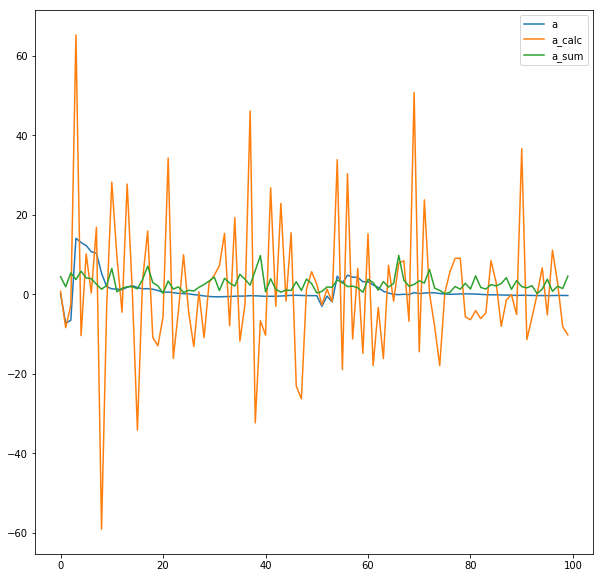

In [19]:
plt.figure(figsize=(10,10))
#plt.plot(m_list, label="meas")
#plt.plot(l[:,0], label='v')
plt.plot(l[:,1], label='a')
plt.plot(slice['a_calc'].values, label='a_calc')
plt.plot(slice['a_sum'].values, label='a_sum')

plt.legend()